In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
X


array([[ 1.54843819,  0.39065898],
       [-1.81369167,  0.531679  ],
       [-1.00706079, -0.93718731],
       ...,
       [-1.68844441,  0.655473  ],
       [-0.6388093 , -1.29126153],
       [ 2.56613123, -0.35751914]])

In [5]:
y

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [6]:
pd.DataFrame(X)[0]

0      1.548438
1     -1.813692
2     -1.007061
3      0.025630
4     -0.999644
         ...   
995   -0.838012
996    2.435727
997   -1.688444
998   -0.638809
999    2.566131
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

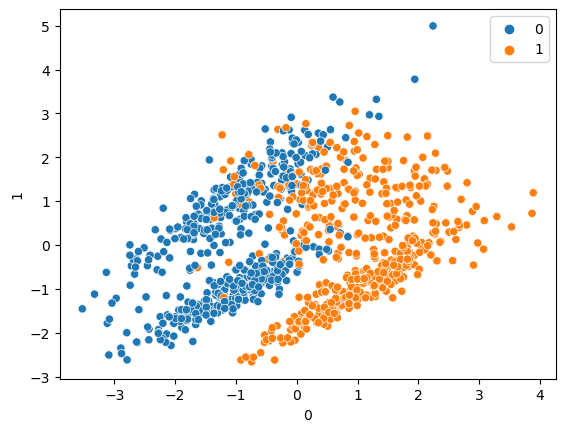

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train  , y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [11]:
from sklearn.svm import SVC

In [12]:
svc = SVC(kernel='linear')

In [13]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
svc.coef_

array([[ 1.92755871, -0.40841922]])

In [16]:
## Prediction
y_pred = svc.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [23]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       128
           1       0.92      0.86      0.89       122

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[119   9]
 [ 17 105]]
0.896


### Hyperparameter Tuning with SVC


In [24]:
from sklearn.model_selection import GridSearchCV

# defining Parameter range 
param_grid ={
   'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.0001],
}

In [25]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [26]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.920 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.920 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.940 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.933 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.907 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.887 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.893 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.907 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001]},
             verbose=3)

In [27]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [29]:
## Predicition
y_pred4 = grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91       128
           1       0.92      0.89      0.90       122

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[119   9]
 [ 14 108]]
0.908
